In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
RANDOM_STATE = 42

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df_tender_2018 = pd.read_csv("../data/releases_2018/tender_2018.csv")
df_tender_2019 = pd.read_csv("../data/releases_2019/tender_2019.csv")
df_tender_2020 = pd.read_csv("../data/releases_2020/tender_2020.csv")
df_tender_2021 = pd.read_csv("../data/releases_2021/tender_2021.csv")
df_tender = pd.concat([df_tender_2018, df_tender_2019, df_tender_2020, df_tender_2021], axis=0)

c:\Users\jhony\miniconda3\envs\icd\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (12,13,14,15,16,18,19,20,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_award_2018 = pd.read_csv("../data/releases_2018/awards_2018.csv")
df_award_2019 = pd.read_csv("../data/releases_2019/awards_2019.csv")
df_award_2020 = pd.read_csv("../data/releases_2020/awards_2020.csv")
df_award_2021 = pd.read_csv("../data/releases_2021/awards_2021.csv")
df_award = pd.concat([df_award_2018, df_award_2019, df_award_2020, df_award_2021], axis=0)

c:\Users\jhony\miniconda3\envs\icd\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (4,5,6,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\jhony\miniconda3\envs\icd\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (4,6,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_contract_2018 = pd.read_csv("../data/releases_2018/contracts_2018.csv")
df_contract_2019 = pd.read_csv("../data/releases_2019/contracts_2019.csv")
df_contract_2020 = pd.read_csv("../data/releases_2020/contracts_2020.csv")
df_contract_2021 = pd.read_csv("../data/releases_2021/contracts_2021.csv")
df_contract = pd.concat([df_contract_2018, df_contract_2019, df_contract_2020, df_contract_2021], axis=0)

c:\Users\jhony\miniconda3\envs\icd\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (7,8,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df_supplier_2018 = pd.read_csv("../data/releases_2018/suppliers_2018.csv")
df_supplier_2019 = pd.read_csv("../data/releases_2019/suppliers_2019.csv")
df_supplier_2020 = pd.read_csv("../data/releases_2020/suppliers_2020.csv")
df_supplier_2021 = pd.read_csv("../data/releases_2021/suppliers_2021.csv")
df_supplier = pd.concat([df_supplier_2018, df_supplier_2019, df_supplier_2020, df_supplier_2021], axis=0)

In [8]:
feature1_tender = df_tender[["ocid", "procuringEntity_name", "value_amount", "procurementMethod"]]
feature1_award = df_award[["ocid", "id", "amount", "status"]]
feature1_contract = df_contract[["ocid", "id", "amount"]]
feature1_supplier = df_supplier[["award_id", "name"]]

In [64]:
main_df = feature1_award.merge(feature1_contract, left_on="ocid", right_on="ocid", how="left", suffixes=("_aw", "_ctr"))
main_df = main_df.merge(feature1_tender, left_on="ocid", right_on="ocid", how="left")
main_df = main_df.merge(feature1_supplier, left_on="id_aw", right_on="award_id", how="left")

In [65]:
main_df.columns

Index(['ocid', 'id_aw', 'amount_aw', 'status', 'id_ctr', 'amount_ctr',
       'procuringEntity_name', 'value_amount', 'procurementMethod', 'award_id',
       'name'],
      dtype='object')

In [66]:
main_df.shape

(1547451, 11)

In [67]:
filtro1 = ~((main_df["amount_ctr"].isnull()) | (main_df["amount_aw"].isnull()) | (main_df["value_amount"].isnull()))
main_df = main_df[filtro1]


In [68]:
filtro2 = ((abs(stats.zscore(main_df["amount_aw"])) < 3) & (abs(stats.zscore(main_df["amount_ctr"])) < 3) & (abs(stats.zscore(main_df["value_amount"])) < 3))
main_df = main_df[filtro2]

In [69]:
main_df.shape

(639819, 11)

In [70]:
main_df["diferencia_absoluta"] = np.abs(main_df["amount_aw"] - main_df["amount_ctr"])
main_df["diferencia_relativa"] = np.abs(main_df["diferencia_absoluta"] / main_df["amount_aw"])
main_df.head()

,ocid,id_aw,amount_aw,status,id_ctr,amount_ctr,procuringEntity_name,value_amount,procurementMethod,award_id,name,diferencia_absoluta,diferencia_relativa
14,ocds-5wno2w-RE-HEJCA-F-66-2018-87497,3416132-RE-HEJCA-F-66-2018,14810.82,NaN,565301-RE-HEJCA-F-66-2018,14810.82,HOSPITAL DE ESPECIALIDADES JOSÉ CARRASCO ARTEAGA,14810.82,direct,3416132-RE-HEJCA-F-66-2018,QUIFATEX S.A.,0.00,0.00
15,ocds-5wno2w-RE-PU-D17D05-002-201-70367,3203446-RE-PU-D17D05-002-201,9451.84,NaN,539734-RE-PU-D17D05-002-201,9451.84,DIRECCION DISTRITAL 17D05 LA CONCEPCION A ZAMB...,9451.84,direct,3203446-RE-PU-D17D05-002-201,MEDILABOR S.A.,0.00,0.00
20,ocds-5wno2w-CDC-APCNFY-001-2018-913591,3502812-CDC-APCNFY-001-2018,2500.00,NaN,614731-CDC-APCNFY-001-2018,2500.00,ASOCIACION DE PEQUEÑOS PRODUCTORES DE CAFE NUE...,2500.00,direct,3502812-CDC-APCNFY-001-2018,MOROCHO MALLA ANGELA ELIZABETH,0.00,0.00
21,ocds-5wno2w-CDC-APCNFY-003-2018-913591,3502856-CDC-APCNFY-003-2018,4285.00,NaN,614724-CDC-APCNFY-003-2018,4285.00,ASOCIACION DE PEQUEÑOS PRODUCTORES DE CAFE NUE...,4285.71,direct,3502856-CDC-APCNFY-003-2018,QUILAMBAQUI LOJA FREDY LEONARDO,0.00,0.00
22,ocds-5wno2w-CDC-APCNFY-004-2018-913591,3517947-CDC-APCNFY-004-2018,2000.00,NaN,614728-CDC-APCNFY-004-2018,2000.00,ASOCIACION DE PEQUEÑOS PRODUCTORES DE CAFE NUE...,2000.00,direct,3517947-CDC-APCNFY-004-2018,IZQUIERDO IDROVO MARIA FERNANDA,0.00,0.00


In [71]:
percentaje = main_df.groupby(["procuringEntity_name", "name"])["id_aw"].count().reset_index()

In [72]:
main_df = main_df.groupby("procuringEntity_name").agg({
    "diferencia_relativa" : "mean",
    "diferencia_absoluta" : "mean",
}).reset_index()

In [73]:

main_df["total_procesos"] = percentaje.groupby(["procuringEntity_name"])["id_aw"].sum().reset_index()["id_aw"]
main_df["unicos"] = percentaje.groupby(["procuringEntity_name"])["id_aw"].count().reset_index()["id_aw"]
main_df["porcentaje_unicos"] = main_df["unicos"] / main_df["total_procesos"]

In [74]:
filtro3 = main_df["diferencia_relativa"] <= 20
main_df = main_df[filtro3]

In [75]:
main_df.head()

,procuringEntity_name,diferencia_relativa,diferencia_absoluta,total_procesos,unicos,porcentaje_unicos
0,\t GOBIERNO AUTONOMO PARROQUIAL DE SINAI,0.00,0.00,1,1,1.00
1,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PARRO...,0.00,0.00,3,3,1.00
2,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,1,1,1.00
3,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,3,3,1.00
4,ACCION SOCIAL DEL GOBIERNO AUTONOMO DESCENTRAL...,0.00,0.00,2,1,0.50


In [76]:
main_df.columns = ["Licitante", "Diferencia relativa Promedio", "Diferencia absoluta promedio", "Total Procesos", "Empresas Unicas", "Porcentaje Empresas Unicas"]
main_df.head()

,Licitante,Diferencia relativa Promedio,Diferencia absoluta promedio,Total Procesos,Empresas Unicas,Porcentaje Empresas Unicas
0,\t GOBIERNO AUTONOMO PARROQUIAL DE SINAI,0.00,0.00,1,1,1.00
1,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PARRO...,0.00,0.00,3,3,1.00
2,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,1,1,1.00
3,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,3,3,1.00
4,ACCION SOCIAL DEL GOBIERNO AUTONOMO DESCENTRAL...,0.00,0.00,2,1,0.50


In [77]:
columns = ["Diferencia relativa Promedio", "Total Procesos", "Porcentaje Empresas Unicas"]
X = main_df.loc[:,columns]

In [78]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [79]:
X_norm = sc.transform(X)

In [80]:
X_norm.shape

(2494, 3)

In [81]:
clusters = np.arange(2,16)
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

In [82]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

<AxesSubplot:xlabel='K', ylabel='inercia'>

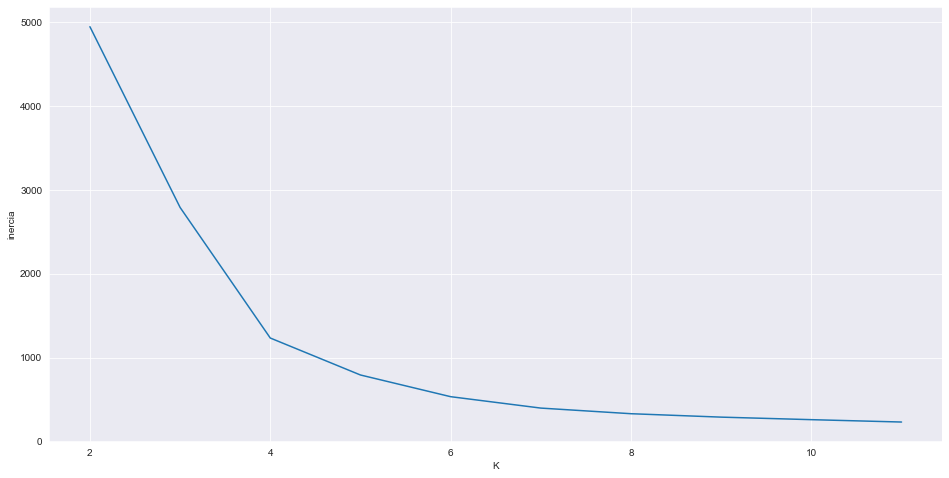

In [83]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data = eva[:10], x = "K", y = "inercia")

In [84]:
kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE)

In [85]:
kmeans.fit(X_norm)

KMeans(n_clusters=4, random_state=42)

In [86]:
main_df["Cluster"] = kmeans.labels_

In [87]:
main_df.head()

,Licitante,Diferencia relativa Promedio,Diferencia absoluta promedio,Total Procesos,Empresas Unicas,Porcentaje Empresas Unicas,Cluster
0,\t GOBIERNO AUTONOMO PARROQUIAL DE SINAI,0.00,0.00,1,1,1.00,0
1,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PARRO...,0.00,0.00,3,3,1.00,0
2,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,1,1,1.00,0
3,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,3,3,1.00,0
4,ACCION SOCIAL DEL GOBIERNO AUTONOMO DESCENTRAL...,0.00,0.00,2,1,0.50,2


In [88]:
main_df[main_df["Cluster"] == 2]

,Licitante,Diferencia relativa Promedio,Diferencia absoluta promedio,Total Procesos,Empresas Unicas,Porcentaje Empresas Unicas,Cluster
4,ACCION SOCIAL DEL GOBIERNO AUTONOMO DESCENTRAL...,0.00,0.00,2,1,0.50,2
6,AGENCIA DE ASEGURAMIENTO DE LA CALIDAD DE LOS ...,0.70,71018.14,10,2,0.20,2
7,AGENCIA DE REGULACION Y CONTROL DE LAS TELECOM...,0.00,0.00,31,22,0.71,2
8,AGENCIA DE REGULACION Y CONTROL MINERO,0.00,0.00,19,7,0.37,2
9,AGENCIA DE REGULACIÓN Y CONTROL DE ENERGÍA Y R...,0.00,0.00,20,14,0.70,2
...,...,...,...,...,...,...,...
2535,Universidad Tecnica de Machala,0.21,110.32,68,30,0.44,2
2537,Universidad Técnica del Norte,0.02,263.87,50,27,0.54,2
2538,VICEPRESIDENCIA DE LA REPUBLICA,0.00,0.00,14,7,0.50,2
2541,comando provincial de la policia del guayas nr...,0.03,7176.36,33,19,0.58,2


In [89]:
df_by_cluster =  main_df.groupby("Cluster").agg({"Diferencia relativa Promedio": np.mean, "Total Procesos": np.mean, "Porcentaje Empresas Unicas": np.mean,})
df_by_cluster

,Diferencia relativa Promedio,Total Procesos,Porcentaje Empresas Unicas
Cluster,,,
0,0.02,6.31,0.95
1,17.43,336225.00,0.00
2,0.38,69.98,0.48
3,9.40,1668.78,0.23


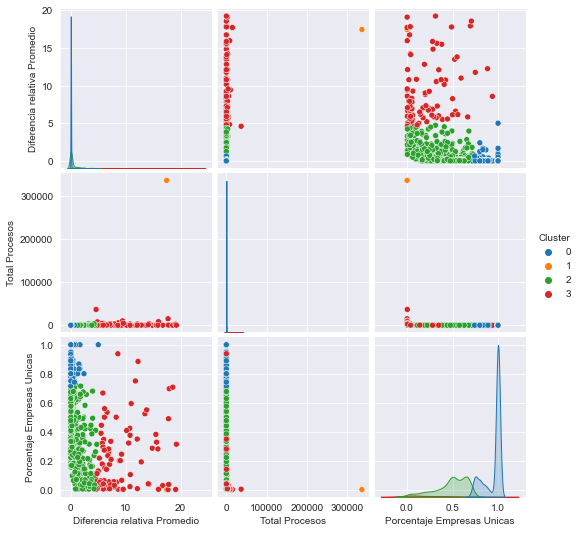

In [90]:
columns = ["Diferencia relativa Promedio", "Total Procesos", "Porcentaje Empresas Unicas", "Cluster"]
sns.set_style("darkgrid")
axs = sns.pairplot(main_df.loc[:,columns], hue="Cluster", palette="tab10")
axs.fig.savefig("../output/kmeans.jpg")
